In [18]:
#pip install nbformat
#pip install plotly --upgrade

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py

%matplotlib widget

In [19]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
parula_map.set_under(cm_data[0])

In [20]:
#filename1 = '/home/devlamin/Documents/WKBeam_related/Cases_ran_before/TCV72644_1.25/No_fluct/QL_bounce_TCV72644_1.25_test.h5'
filename1 = '/home/devlamin/Documents/WKBeam_related/WKBacca_QL/QL_bounce_TCV72644_1.25_test.h5' # Test with smaller file
filename2 = '/home/devlamin/Documents/WKBeam_related/Cases_ran_before/TCV72644_1.25/Fluct/QL_bounce_TCV72644_1.25_test.h5'
#Had to move the file due to size limit


In [21]:
matlab_file = '/home/devlamin/Documents/WKBeam_related/WKBacca_QL/WKBacca_cases/TCV72644_1.25/input/Drf_data.mat'

from scipy.io import loadmat

mat = loadmat(matlab_file)['Drf_data']
Drf_mat = mat['dat'][0,0]
rho_mat = mat['rhoP'][0,0][0]
Pnorm_mat = mat['PP'][0,0]
Ksi0_mat = mat['MHU'][0,0]
Ppar_mat, Pper_mat = Pnorm_mat*Ksi0_mat, Pnorm_mat*np.sqrt(1-Ksi0_mat**2)
print(Drf_mat.shape, rho_mat.shape, Pnorm_mat.shape, Ksi0_mat.shape)



(299, 142, 30) (30,) (142, 299) (142, 299)


(40, 40, 69, 1)
(40, 100, 299, 1)
The fluctuating and non-fluctuating data are different
psi:  False
theta:  True
p_norm:  False
ksi0:  False
harmonics:  True


/tmp/ipykernel_6484/1848294893.py:35: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print('p_norm: ', np.all(p_norm_fluct == p_norm))
/tmp/ipykernel_6484/1848294893.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print('ksi0: ', np.all(ksi0_fluct == ksi0))


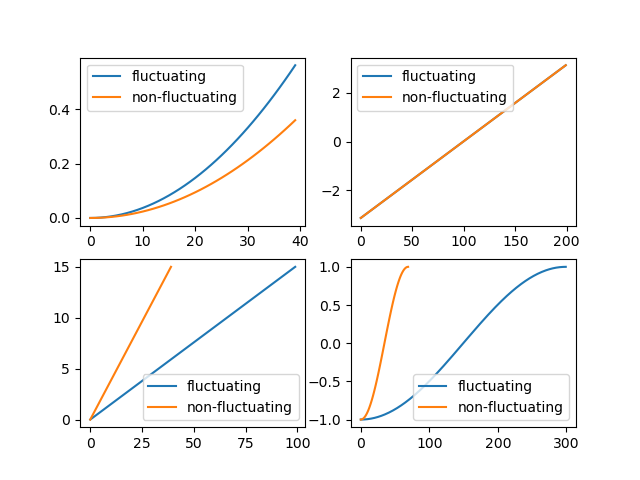

In [22]:
file1 = h5py.File(filename1, 'r')
file2 = h5py.File(filename2, 'r')
# Read the data

# Select the wanted grid
grid = 'wh'
dataname = 'DRF0_' + grid

DRF0_nofluct = file1[dataname][()]
DRF0_fluct = file2[dataname][()]
print(DRF0_nofluct.shape)
print(DRF0_fluct.shape)
DRF0_fluct = np.sum(DRF0_fluct, axis=-1)
DRF0_nofluct = np.sum(DRF0_nofluct, axis=-1)

psi = file1['psi'][()]
theta = file1['theta'][()]  
p_norm = file1['p_norm'][()]
ksi0 = file1['ksi0'][()][()]
harmonics = file1['harmonics'][()]

psi_fluct = file2['psi'][()]
theta_fluct = file2['theta'][()]
p_norm_fluct = file2['p_norm'][()]
ksi0_fluct = file2['ksi0'][()][()]
harmonics_fluct = file2['harmonics'][()]

# Check if these are the same
if np.all(psi_fluct == psi) and np.all(theta_fluct == theta) and np.all(p_norm_fluct == p_norm) and np.all(ksi0_fluct == ksi0) and np.all(harmonics_fluct == harmonics):
    print('The fluctuating and non-fluctuating data are the same')
else:
    print('The fluctuating and non-fluctuating data are different')
    print('psi: ', np.all(psi_fluct == psi))
    print('theta: ', np.all(theta_fluct == theta))
    print('p_norm: ', np.all(p_norm_fluct == p_norm))
    print('ksi0: ', np.all(ksi0_fluct == ksi0))
    print('harmonics: ', np.all(harmonics_fluct == harmonics))
    plt.figure()
    ax = plt.subplot(221)
    plt.plot(psi_fluct.flatten(), label='fluctuating')
    plt.plot(psi.flatten(), label='non-fluctuating')
    plt.legend()
    ax = plt.subplot(222)
    plt.plot(theta_fluct.flatten(), label='fluctuating')
    plt.plot(theta.flatten(), label='non-fluctuating')
    plt.legend()
    ax = plt.subplot(223)
    plt.plot(p_norm_fluct.flatten(), label='fluctuating')
    plt.plot(p_norm.flatten(), label='non-fluctuating')
    plt.legend()
    ax = plt.subplot(224)
    plt.plot(ksi0_fluct.flatten(), label='fluctuating')
    plt.plot(ksi0.flatten(), label='non-fluctuating')
    plt.legend()
    plt.show()


if grid == 'wh':
    p_norm = p_norm
    ksi0 = 0.5 * (ksi0[1:] + ksi0[:-1])
    Trapksi0_nofluct = file1['Trapksi0_h'][()]
    Trapksi0_fluct = file2['Trapksi0_h'][()]
elif grid == 'hh':
    p_norm = 0.5 * (p_norm[1:] + p_norm[:-1])
    ksi0 = 0.5 * (ksi0[1:] + ksi0[:-1])
    Trapksi0_nofluct = file1['Trapksi0_h'][()]
    Trapksi0_fluct = file2['Trapksi0_h'][()]
else:
    p_norm = 0.5 * (p_norm[1:] + p_norm[:-1])
    ksi0 = ksi0
    Trapksi0_nofluct = file1['Trapksi0_w'][()]
    Trapksi0_fluct = file2['Trapksi0_w'][()]

p_max = np.max(p_norm)
rho_max_nofl = np.max(np.sqrt(psi))
rho_max_fluct = np.max(np.sqrt(psi_fluct))


h5py.File.close(file1)
h5py.File.close(file2)

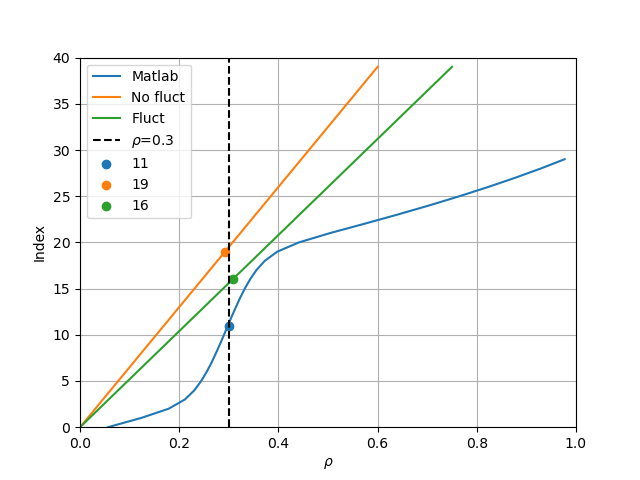

In [23]:
def closest_index(val):
    return np.argmin(np.abs(rho_mat- val)), np.argmin(np.abs(np.sqrt(psi)- val)), np.argmin(np.abs(np.sqrt(psi_fluct)- val))

rho_goal = 0.3

plt.figure()
len_mat = rho_mat.shape[0]
len_no_fluct = len(psi)
len_fluct = len(psi_fluct)

plt.plot(rho_mat, np.arange(len_mat), label='Matlab')
plt.plot(np.sqrt(psi), np.arange(len_no_fluct), label='No fluct')
plt.plot(np.sqrt(psi_fluct), np.arange(len_fluct), label='Fluct')
plt.axvline([rho_goal], color='k', linestyle='--', label=rf'$\rho$={rho_goal}')

i_mat, i_no_fluct, i_fluct = closest_index(rho_goal)

plt.scatter([rho_goal], [i_mat], label=f'{i_mat}')
plt.scatter([np.sqrt(psi[i_no_fluct])], [i_no_fluct], label=f'{i_no_fluct}')
plt.scatter([np.sqrt(psi_fluct[i_fluct])], [i_fluct], label=f'{i_fluct}')
plt.grid()
plt.xlabel(r'$\rho$')
plt.ylabel('Index')
plt.xlim(0, 1)
plt.ylim(0, 40)
plt.legend()
plt.show()



In [24]:
Pnorm, Ksi0 = np.meshgrid(p_norm, ksi0)

Ppar, Pper = Pnorm*Ksi0, Pnorm*np.sqrt(1-Ksi0**2)

PPAR = np.tile(Ppar, (len(psi), 1, 1))
PPER = np.tile(Pper, (len(psi), 1, 1))
KSI0 = np.tile(Ksi0, (len(psi), 1, 1))

RHO_nofluct = np.tile(np.sqrt(psi.T), (len(p_norm), len(ksi0), 1)).T
RHO_fluct = np.tile(np.sqrt(psi_fluct.T), (len(p_norm), len(ksi0), 1)).T

DRF0_nofluct = np.transpose(DRF0_nofluct, (0, 2, 1))
DRF0_fluct = np.transpose(DRF0_fluct, (0, 2, 1))

print(DRF0_nofluct.shape)
print(PPER.shape)
print(PPAR.shape)
print(RHO_nofluct.shape)
print(KSI0.shape)

(40, 69, 40)
(40, 69, 40)
(40, 69, 40)
(40, 69, 40)
(40, 69, 40)


In [25]:
DRF_pp_nofluct = DRF0_nofluct*(1-KSI0**2) # D_rf_pp, DKE 4.298
DRF_pp_fluct = DRF0_fluct*(1-KSI0**2)

ValueError: operands could not be broadcast together with shapes (40,299,100) (40,69,40) 

In [26]:
# Interpolate the calculated data and matlab data to the same grid

from scipy.interpolate import RegularGridInterpolator
x_comp = np.linspace(min(rho_mat), 0.6, 20)
Drf_mat_shifted = np.transpose(Drf_mat, (2, 1, 0))
print(Drf_mat_shifted.shape)
print(DRF0_nofluct.shape)


DRF0_nofluct_int = RegularGridInterpolator((np.sqrt(psi), ksi0, p_norm), DRF0_nofluct, bounds_error=False, fill_value=None)
Drf_mat_int = RegularGridInterpolator((rho_mat, Ksi0_mat[:, 1], Pnorm_mat[1, :]), Drf_mat_shifted, bounds_error=False, fill_value=None)

RHO_mat= np.tile((x_comp), (len(p_norm), len(ksi0), 1)).T
PPAR_mat = np.tile(Ppar, (len(x_comp), 1, 1))
PPER_mat = np.tile(Pper, (len(x_comp), 1, 1))
DRF0_nofluct_interp = DRF0_nofluct_int((RHO_mat, Ksi0, Pnorm))
Drf_mat_interp = Drf_mat_int((RHO_mat, Ksi0, Pnorm))
print(DRF0_nofluct_interp.shape)
print(Drf_mat_interp.shape)



(30, 142, 299)
(40, 69, 40)
(20, 69, 40)
(20, 69, 40)


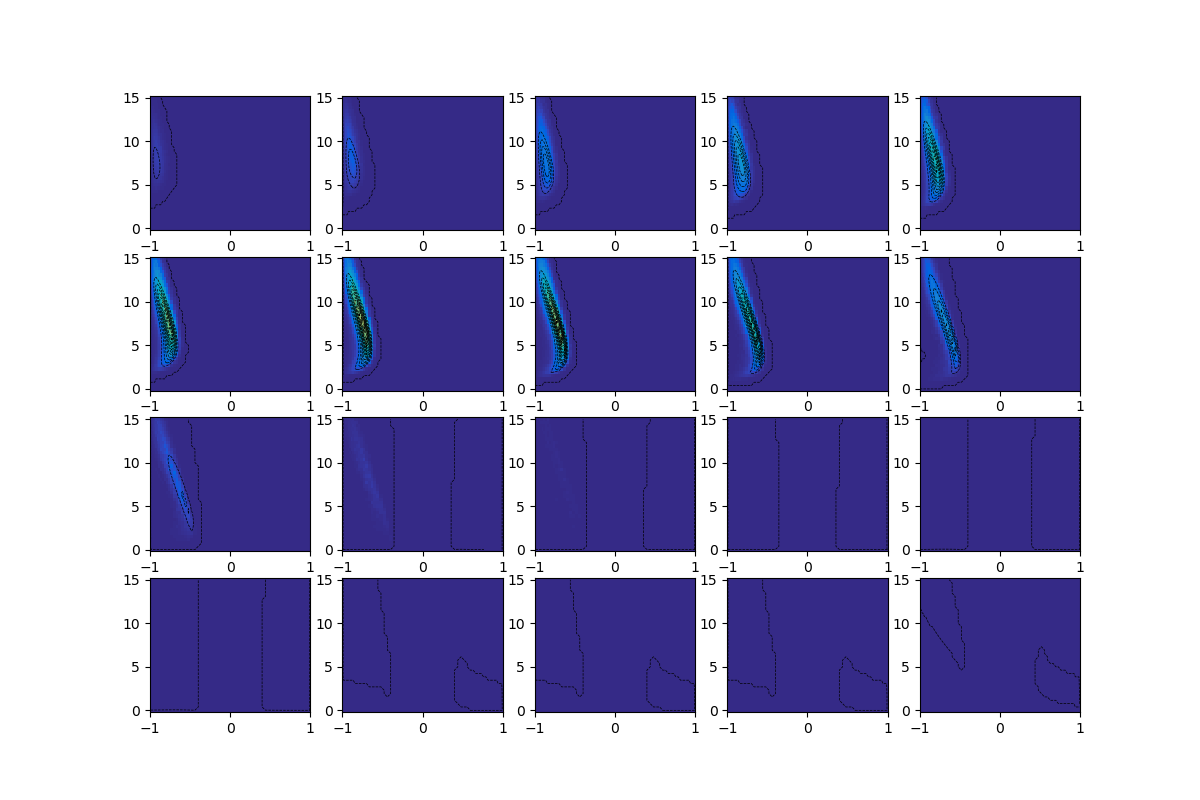

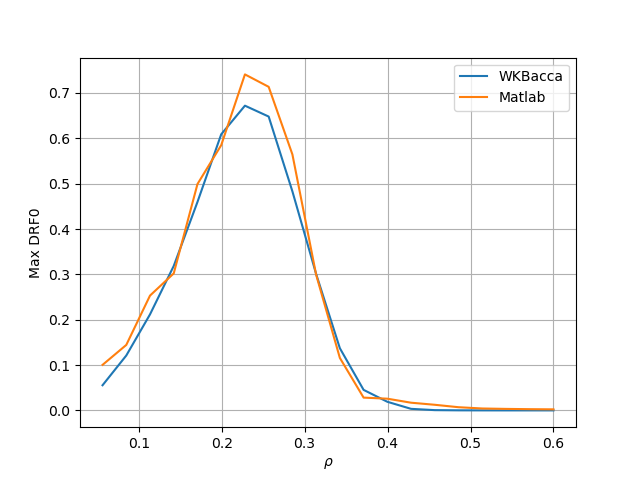

In [27]:

plt.figure(figsize=(12, 8))
for i in range(len(x_comp)):
    ax = plt.subplot(4, 5, i+1)
    ax.pcolormesh(ksi0, p_norm,1/5*x_comp[i]**2*DRF0_nofluct_interp[i,:, :].T, cmap=parula_map, vmin=0, vmax=1)
    ax.contour(ksi0, p_norm, Drf_mat_interp[i,:, :].T, np.linspace(0, 1, 20), colors='k', linestyles='dashed', linewidths=0.5)

plt.show()

plt.figure()
plt.plot(x_comp, 1/5*x_comp**2*np.amax(DRF0_nofluct_interp[:, :, :], axis=(1, 2)), label='WKBacca')
plt.plot(x_comp, np.amax(Drf_mat_interp[:, :, :], axis=(1, 2)), label='Matlab')
plt.xlabel(r'$\rho$')
plt.ylabel('Max DRF0')
plt.legend()
plt.grid()
plt.show()



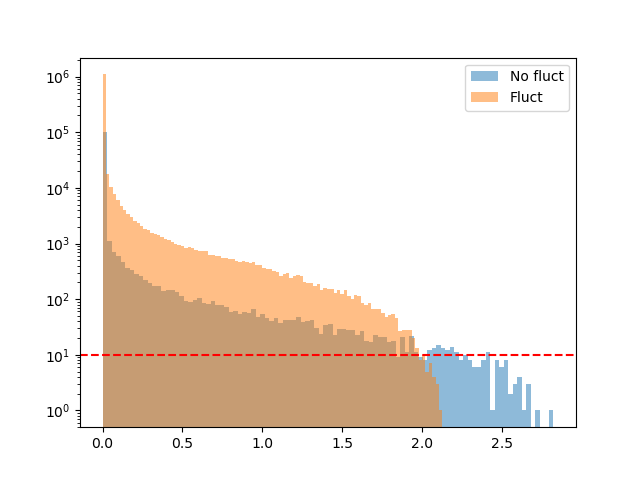

In [35]:
plt.figure()
freqbins_nofluct = plt.hist(DRF_pp_nofluct.flatten(), bins=100, density=False, log=True, alpha=0.5, label='No fluct')
freqbins_fluct = plt.hist(DRF_pp_fluct.flatten(), bins=100, density=False, log=True, alpha=0.5, label='Fluct')
plt.axhline(1e1, color='r', linestyle='--')
plt.legend()
plt.show()

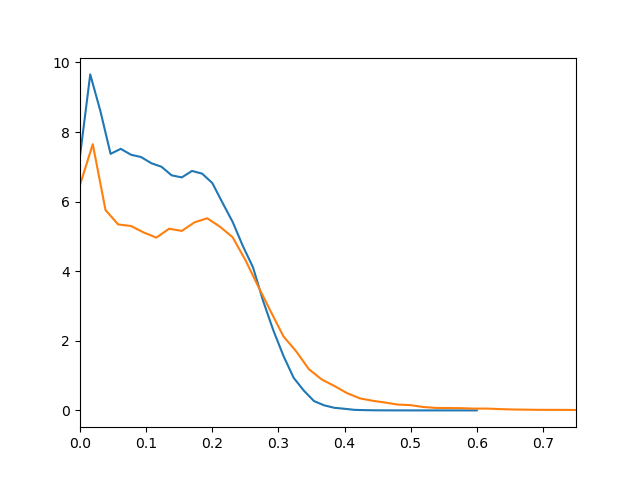

In [36]:
plt.figure()
plt.plot(np.sqrt(psi),np.nanmax(DRF0_nofluct, axis=(1, 2)))
plt.plot(np.sqrt(psi_fluct),np.nanmax(DRF0_fluct, axis=(1, 2)))

#plt.yscale('log')
plt.xlim(0, max([rho_max_nofl, rho_max_fluct]))
plt.show()

In [37]:
DRF_pp_nofluct_max = np.nanmax(DRF_pp_nofluct)
Lowerbound = 1e-5
# For the later 3D scatter plot
DRF_pp_nofluct_present = DRF_pp_nofluct[DRF_pp_nofluct>DRF_pp_nofluct_max*Lowerbound]
DRF_pp_nofluct_present /= np.nanmax(DRF_pp_nofluct_present)
DRF_pp_fluct_present = DRF_pp_fluct[DRF_pp_nofluct>DRF_pp_nofluct_max*Lowerbound]
DRF_pp_fluct_present /= np.nanmax(DRF_pp_fluct_present)


print(DRF_pp_nofluct_present.size/DRF_pp_nofluct.size)

RHO_present_nofluct = RHO_nofluct[DRF_pp_nofluct>DRF_pp_nofluct_max*Lowerbound]
PPAR_present_nofluct = PPAR[DRF_pp_nofluct>DRF_pp_nofluct_max*Lowerbound]
PPER_present_nofluct = PPER[DRF_pp_nofluct>DRF_pp_nofluct_max*Lowerbound]

RHO_present_fluct = RHO_fluct[DRF_pp_nofluct>DRF_pp_nofluct_max*Lowerbound]
PPAR_present_fluct = PPAR[DRF_pp_nofluct>DRF_pp_nofluct_max*Lowerbound]
PPER_present_fluct = PPER[DRF_pp_nofluct>DRF_pp_nofluct_max*Lowerbound]

Drf_mat_interp_max = np.nanmax(Drf_mat_interp)
Drf_mat_interp_present = Drf_mat_interp[Drf_mat_interp>Drf_mat_interp_max*Lowerbound]
Drf_mat_interp_present /= np.nanmax(Drf_mat_interp_present)

RHO_mat_present = RHO_mat[Drf_mat_interp>Drf_mat_interp_max*Lowerbound]
PPAR_mat_present = PPAR_mat[Drf_mat_interp>Drf_mat_interp_max*Lowerbound]
PPER_mat_present = PPER_mat[Drf_mat_interp>Drf_mat_interp_max*Lowerbound]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 299 but corresponding boolean dimension is 69

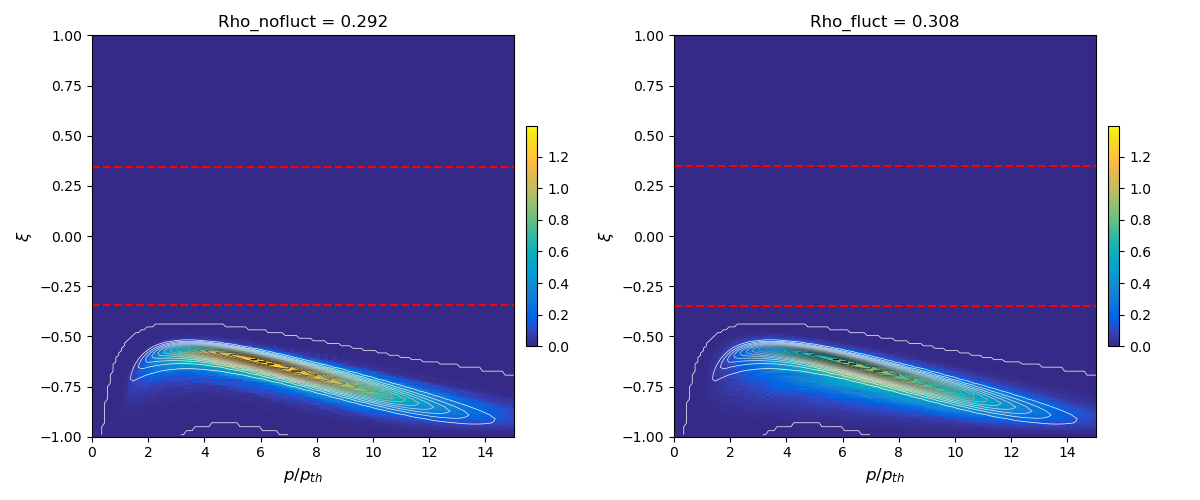

Max discrepancy: 3.0583221977344452


In [15]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(121)

DRF_pp_nofluct = np.where(DRF_pp_nofluct<DRF_pp_nofluct_max*Lowerbound, 0, DRF_pp_nofluct)
DRF_pp_fluct = np.where(DRF_pp_fluct<DRF_pp_nofluct_max*Lowerbound, 0, DRF_pp_fluct)
totalmin = np.min([np.nanmin(DRF_pp_nofluct[i_no_fluct]), np.nanmin(DRF_pp_fluct[i_fluct])])
totalmax = np.max([np.nanmax(DRF_pp_nofluct[i_no_fluct]), np.nanmax(DRF_pp_fluct[i_fluct])])


fig = ax.pcolormesh(Pnorm, Ksi0, DRF_pp_nofluct[i_no_fluct], cmap=parula_map, vmin=totalmin, vmax=totalmax)
fig2 = ax.contour(Pnorm_mat, Ksi0_mat, Drf_mat[:,:,i_mat].T, levels=15, cmap='Greys', linewidths=0.5)

colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

ax.axhline(Trapksi0_nofluct[i_no_fluct], color='r', linestyle='--')
ax.axhline(-Trapksi0_nofluct[i_no_fluct], color='r', linestyle='--')
ax.set_xlabel(r'$p/p_{th}$', size=12)
ax.set_ylabel(r'$\xi$', size=12)
ax.set_ylim(-1, 1)
ax.set_xlim(0, p_max)
ax.set_title(f'Rho_nofluct = {np.sqrt(psi[i_no_fluct]):.3}')

ax = plt.subplot(122)
fig = ax.pcolormesh(Pnorm, Ksi0, DRF_pp_fluct[i_fluct], cmap=parula_map, vmin=totalmin, vmax=totalmax)
fig2 = ax.contour(Pnorm_mat, Ksi0_mat, Drf_mat[:,:,i_mat].T, levels=15, cmap='Greys', linewidths=0.5)

colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

ax.axhline(Trapksi0_fluct[i_fluct], color='r', linestyle='--')
ax.axhline(-Trapksi0_fluct[i_fluct], color='r', linestyle='--')
ax.set_xlabel(r'$p/p_{th}$', size=12)
ax.set_ylabel(r'$\xi$', size=12)
ax.set_ylim(-1, 1)
ax.set_xlim(0, p_max)
ax.set_title(f'Rho_fluct = {np.sqrt(psi_fluct[i_fluct]):.3}')

plt.tight_layout()
plt.show()

print(f'Max discrepancy: {np.max(DRF_pp_nofluct[i_no_fluct]/np.amax(Drf_mat[:,:,i_mat].T))}')

In [16]:
def Trapping_line(p_par, Trapksi0, i_psi):
    #Trapping line, giving p_perp_Trap = p_par_Trap * sqrt(1 - ksi0_T^2)/ksi0_T*sign(p_par_Trap)
    return np.sign(p_par) * p_par * np.sqrt(1 - Trapksi0[i_psi]**2)/Trapksi0[i_psi]


/tmp/ipykernel_177352/2431418170.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  fig = ax.pcolormesh(PPAR[i_no_fluct], PPER[i_no_fluct], DRF_pp_nofluct[i_no_fluct], cmap=parula_map, vmin=totalmin, vmax=totalmax)#, norm=LogNorm())
/tmp/ipykernel_177352/2431418170.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  fig3 = ax.pcolormesh(PPAR[i_fluct], PPER[i_fluct], DRF_pp_fluct[i_fluct], cmap=parula_map, vmin=totalmin, vmax=totalmax)#, norm=LogNorm())
/tmp/ipykernel_177352/2431418170.py:25: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space f

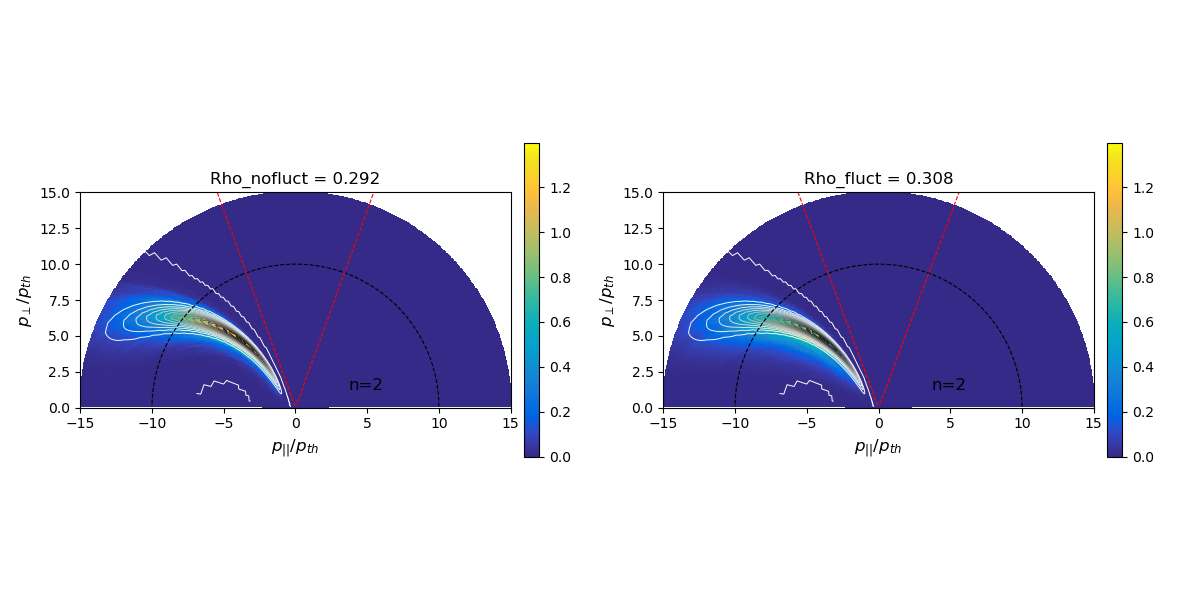

In [17]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(121)

fig = ax.pcolormesh(PPAR[i_no_fluct], PPER[i_no_fluct], DRF_pp_nofluct[i_no_fluct], cmap=parula_map, vmin=totalmin, vmax=totalmax)#, norm=LogNorm())
fig2 = ax.contour(Ppar_mat, Pper_mat, Drf_mat[:,:,i_mat].T, levels=15, cmap='Greys', linewidths=0.7)
colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

plt.contour(PPAR[i_no_fluct], PPER[i_no_fluct], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
plt.annotate(r'n=2', xy=(3, 1), xytext=(7, 2), textcoords='offset points', fontsize=12)
plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

p_perp_Trap = Trapping_line(np.linspace(-p_max, p_max, 200), Trapksi0_nofluct, i_no_fluct)
plt.plot(np.linspace(-p_max, p_max, 200), p_perp_Trap, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$p_{||}/p_{th}$', size=12)
ax.set_ylabel(r'$p_{\perp}/p_{th}$', size=12)
ax.set_ylim(0, p_max)
ax.set_xlim(-15, 15)
ax.set_aspect('equal')
ax.set_title(f'Rho_nofluct = {np.sqrt(psi[i_no_fluct]):.3f}')

ax = plt.subplot(122)
fig3 = ax.pcolormesh(PPAR[i_fluct], PPER[i_fluct], DRF_pp_fluct[i_fluct], cmap=parula_map, vmin=totalmin, vmax=totalmax)#, norm=LogNorm())
fig4 = ax.contour(Ppar_mat, Pper_mat, Drf_mat[:,:,i_mat].T, levels=15, cmap='Greys', linewidths=0.7)
colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

plt.contour(PPAR[i_fluct], PPER[i_fluct], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
plt.annotate(r'n=2', xy=(3, 1), xytext=(7, 2), textcoords='offset points', fontsize=12)
plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

p_perp_Trap = Trapping_line(np.linspace(-p_max, p_max, 200), Trapksi0_fluct, i_fluct)
plt.plot(np.linspace(-p_max, p_max, 200), p_perp_Trap, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$p_{||}/p_{th}$', size=12)
ax.set_ylabel(r'$p_{\perp}/p_{th}$', size=12)
ax.set_ylim(0, p_max)
ax.set_xlim(-15, 15)
ax.set_aspect('equal')
ax.set_title(f'Rho_fluct = {np.sqrt(psi_fluct[i_fluct]):.3f}')

plt.tight_layout()
plt.show()



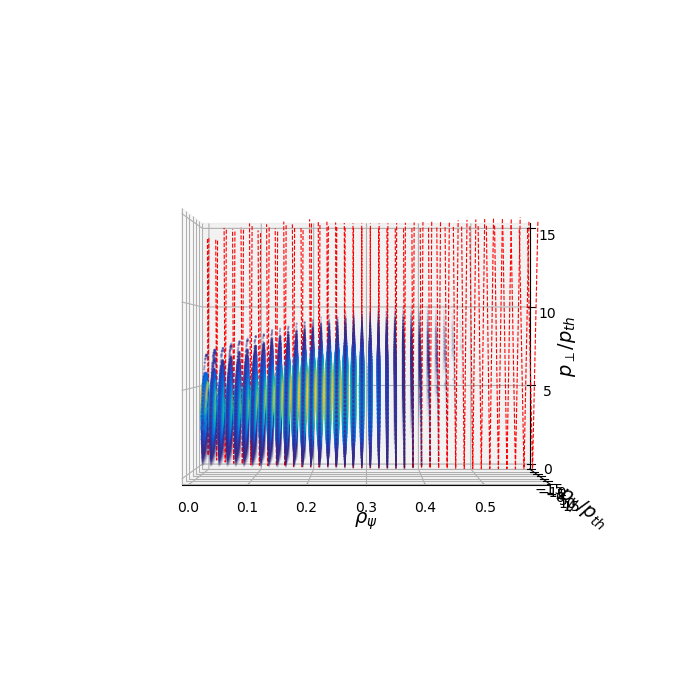

In [18]:
# 3D plot of the QL_bounce

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RHO_present_nofluct[::2], PPAR_present_nofluct[::2], PPER_present_nofluct[::2], c=DRF_pp_nofluct_present[::2], cmap=parula_map, s=30*DRF_pp_nofluct_present[::2], alpha=.3)

# Plot a vertical surface
"""
rho = RHO[i, 0, 0]
ax.plot_surface(np.tile(rho, (len(p_norm), len(ksi0_h))).T, PPAR[i], PPER[i], alpha=0.5, color='grey')
ax.plot([rho, rho], [-16, 16], [-.5, -0.5], color='black', linestyle='dashed', linewidth=1)
ax.plot([rho, rho], [-16, -16], [-.5, 16], color='black', linestyle='dashed', linewidth=1)
"""

# Plot the trapping line at every rho
p_par_T = np.linspace(-p_max, p_max, 200)
for i in range(0, len(psi)):
    p_perp_T = Trapping_line(p_par_T, Trapksi0_nofluct, i)
    # Cut the line short when it would leave the box
    p_perp_T_toplot = p_perp_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    p_par_T_toplot = p_par_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    ax.plot(np.sqrt(psi[i])*np.ones_like(p_par_T_toplot), p_par_T_toplot, p_perp_T_toplot, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$\rho_{\psi}$', fontsize= 14)
ax.set_ylabel(r'$p_{\||}/p_{th}$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/p_{th}$', fontsize= 14, rotation=180)

ax.set_xlim([rho_max_nofl, 0])
ax.set_xticks(np.arange(0, rho_max_nofl, 0.1))
ax.set_ylim([-p_max, p_max])
ax.set_yticks(np.arange(-p_max, p_max+1, 5))
ax.set_zlim([0, p_max])
ax.set_zticks(np.arange(0, p_max+1, 5))

ax.view_init(elev=0, azim=90)

plt.show()

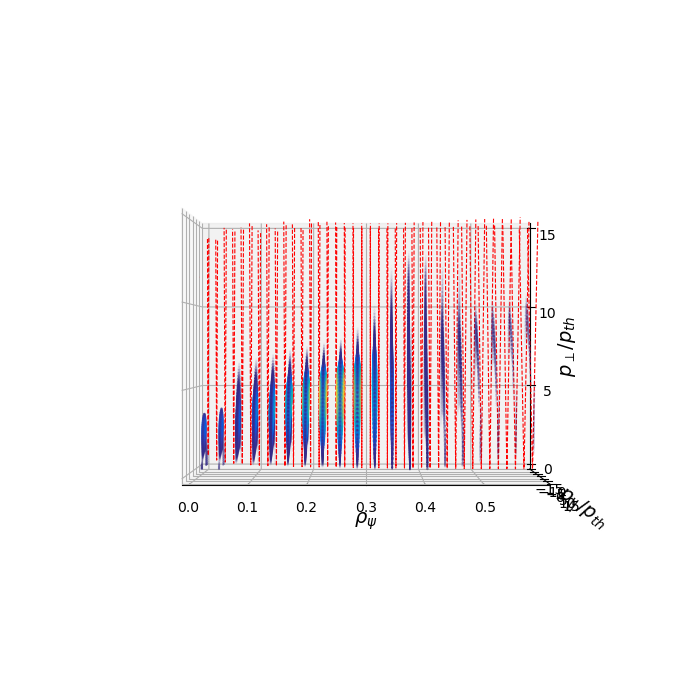

In [22]:
# 3D plot of the QL_bounce from matlab

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RHO_mat_present[::2], PPAR_mat_present[::2], PPER_mat_present[::2], c=Drf_mat_interp_present[::2], cmap=parula_map, s=30*Drf_mat_interp_present[::2], alpha=.3)

# Plot a vertical surface
"""
rho = RHO[i, 0, 0]
ax.plot_surface(np.tile(rho, (len(p_norm), len(ksi0_h))).T, PPAR[i], PPER[i], alpha=0.5, color='grey')
ax.plot([rho, rho], [-16, 16], [-.5, -0.5], color='black', linestyle='dashed', linewidth=1)
ax.plot([rho, rho], [-16, -16], [-.5, 16], color='black', linestyle='dashed', linewidth=1)
"""

# Plot the trapping line at every rho
p_par_T = np.linspace(-p_max, p_max, 200)
for i in range(0, len(psi)):
    p_perp_T = Trapping_line(p_par_T, Trapksi0_nofluct, i)
    # Cut the line short when it would leave the box
    p_perp_T_toplot = p_perp_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    p_par_T_toplot = p_par_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    ax.plot(np.sqrt(psi[i])*np.ones_like(p_par_T_toplot), p_par_T_toplot, p_perp_T_toplot, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$\rho_{\psi}$', fontsize= 14)
ax.set_ylabel(r'$p_{\||}/p_{th}$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/p_{th}$', fontsize= 14, rotation=180)

ax.set_xlim([rho_max_nofl, 0])
ax.set_xticks(np.arange(0, rho_max_nofl, 0.1))
ax.set_ylim([-p_max, p_max])
ax.set_yticks(np.arange(-p_max, p_max+1, 5))
ax.set_zlim([0, p_max])
ax.set_zticks(np.arange(0, p_max+1, 5))

ax.view_init(elev=0, azim=90)

plt.show()

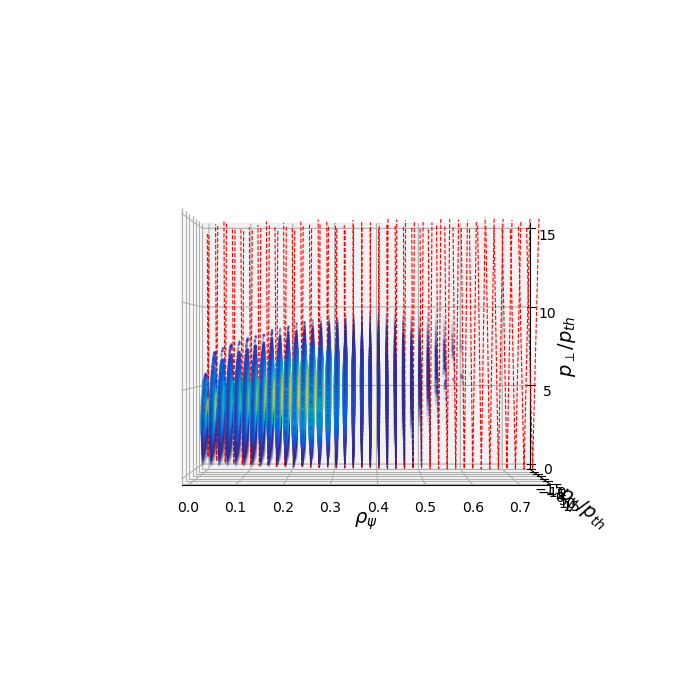

In [19]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RHO_present_fluct[::2], PPAR_present_fluct[::2], PPER_present_fluct[::2], c=DRF_pp_fluct_present[::2], cmap=parula_map, s=30*DRF_pp_fluct_present[::2], alpha=.3)

# Plot the trapping line at every rho
p_par_T = np.linspace(-p_max, p_max, 200)

for i in range(0, len(psi_fluct)):
    p_perp_T = Trapping_line(p_par_T, Trapksi0_fluct, i)
    # Cut the line short when it would leave the box
    p_perp_T_toplot = p_perp_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    p_par_T_toplot = p_par_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    ax.plot(np.sqrt(psi_fluct[i])*np.ones_like(p_par_T_toplot), p_par_T_toplot, p_perp_T_toplot, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$\rho_{\psi}$', fontsize= 14)
ax.set_ylabel(r'$p_{\||}/p_{th}$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/p_{th}$', fontsize= 14, rotation=180)

ax.set_xlim([rho_max_fluct, 0])
ax.set_xticks(np.arange(0, rho_max_fluct, 0.1))
ax.set_ylim([-p_max, p_max])
ax.set_yticks(np.arange(-p_max, p_max+1, 5))
ax.set_zlim([0, p_max])
ax.set_zticks(np.arange(0, p_max+1, 5))

ax.view_init(elev=0, azim=90)

plt.show()